### Data Loading and Formatting

In [47]:
import pandas as pd

# Read the Excel sheet
df = pd.read_excel("BOE.xlsx", index_col=0)

# Replacing the YE in years columns
df.iloc[0] = df.iloc[0].str.replace('YE', '') 

# Adjusting column names according to specific years for clarification
df.columns = [col.split('.')[0] for col in df.columns]
merged_columns = [f"{col}_{col_value}" for col, col_value in df.iloc[0].items()]
merged_columns
df.columns = merged_columns
df.rename(columns={'Unnamed: 0_nan': 'Firms'}, inplace=True)

# Removing the year data itself as we already have that info in the column names
df = df.drop(df.index[0])

# Update the type of all numeric columns for further analysis
lst = []
for column in df.columns:
    if column != 'index_Year':
        lst.append(column)

df = df[lst].astype(float)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Firms'}, inplace=True)


Adding and Merging the second sheet , the merged dataframe now consists of all the columns in both the sheets which is further used for analysis later.

In [48]:
# Load a specific sheet by name
excel_file = 'BOE.xlsx'
df_2 = pd.read_excel(excel_file, sheet_name='Dataset 2 - Underwriting')

# Adjusting this to the same format and column names and column types for merging
df_2.iloc[0] = df_2.iloc[0].str.replace('YE', '')
df_2.columns = [col.split('.')[0] for col in df_2.columns]
merged_columns = [f"{col}_{col_value}" for col, col_value in df_2.iloc[0].items()]
merged_columns
df_2.columns = merged_columns
df_2.rename(columns={'Unnamed: 0_nan': 'Firms'}, inplace=True)

df_2 = df_2.drop(df_2.index[0])


lst = []
for column in df_2.columns:
    if column != 'Firms':
        lst.append(column)

df_2[lst].astype(float)

merged_df = pd.merge(df, df_2, on='Firms', how='inner')
 

### Analysis for Gross Written Premium

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

#Grouping GWP in separate data frames for analysis 
gwp_cols = [col for col in df.columns if 'GWP' in col]
gwp_df = df[gwp_cols]


# Calculate the change in gross claims over the 4 years for each firm
df['Change_in_Gross_Written_Premium'] = df['GWP (£m)_2020'] - df['GWP (£m)_2016']

# Select the top firms with the largest changes in gross claims
top_firms = df.nlargest(20, 'Change_in_Gross_Written_Premium')  # Adjust the number as needed
bottom_firms = df.nsmallest(20, 'Change_in_Gross_Written_Premium')  # Adjust the number as needed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


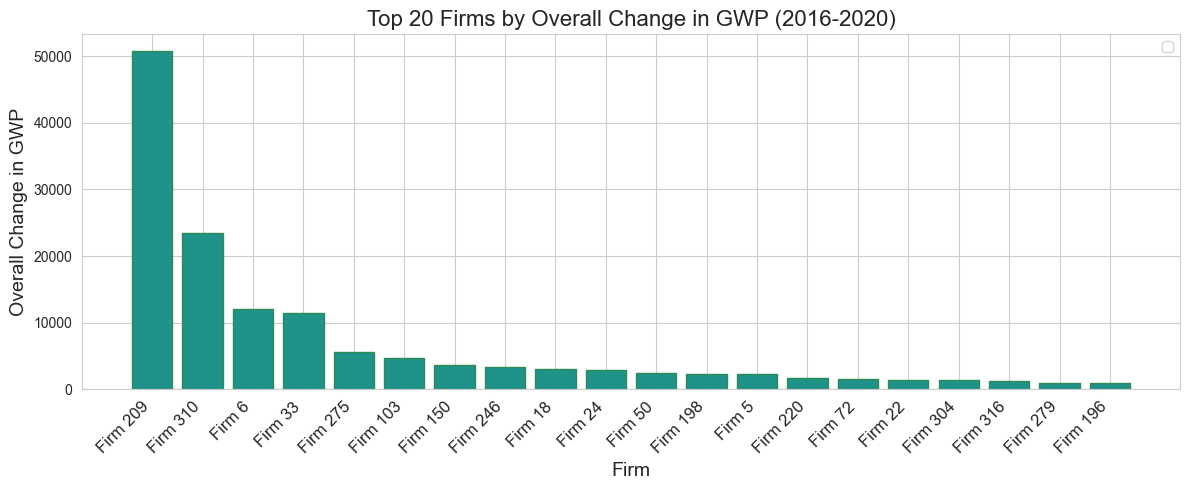

In [51]:
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar chart comparing the overall change in gross claims for the top firms
plt.figure(figsize=(12, 5))

# Plot the bar chart for each firm
for i, (firm, change) in enumerate(zip(top_firms.index, top_firms['Change_in_Gross_Written_Premium'])):
    plt.bar(i, change, color='#1F9289', edgecolor='seagreen', width=0.8)

# Set x-axis tick labels to indicate the firms
plt.xticks(range(len(top_firms)), [f'Firm {firm}' for firm in top_firms.index], rotation=45, ha='right', fontsize=12)

# Add labels for x-axis and y-axis
plt.xlabel('Firm', fontsize=14)
plt.ylabel('Overall Change in GWP', fontsize=14)
plt.title('Top 20 Firms by Overall Change in GWP (2016-2020)', fontsize=16)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


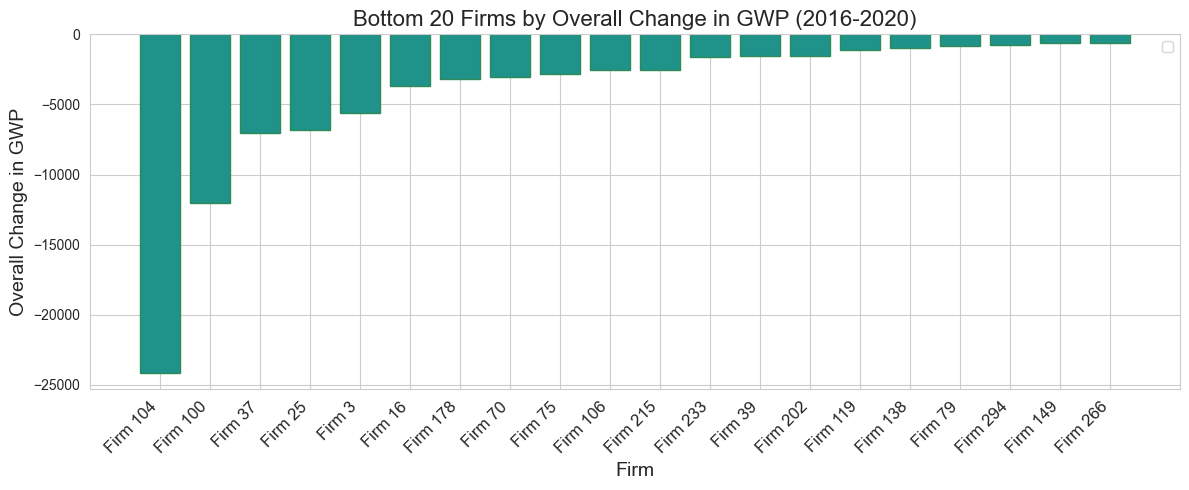

In [52]:
# Create a bar chart comparing the overall change in gross claims for the top firms
plt.figure(figsize=(12, 5))

# Plot the bar chart for each firm
for i, (firm, change) in enumerate(zip(bottom_firms.index, bottom_firms['Change_in_Gross_Written_Premium'])):
    plt.bar(i, change, color='#1F9289', edgecolor='seagreen', width=0.8)

# Set x-axis tick labels to indicate the firms
plt.xticks(range(len(bottom_firms)), [f'Firm {firm}' for firm in bottom_firms.index], rotation=45, ha='right', fontsize=12)

# Add labels for x-axis and y-axis
plt.xlabel('Firm', fontsize=14)
plt.ylabel('Overall Change in GWP', fontsize=14)
plt.title('Bottom 20 Firms by Overall Change in GWP (2016-2020)', fontsize=16)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

### Analysis for SCR Coverage Ratio

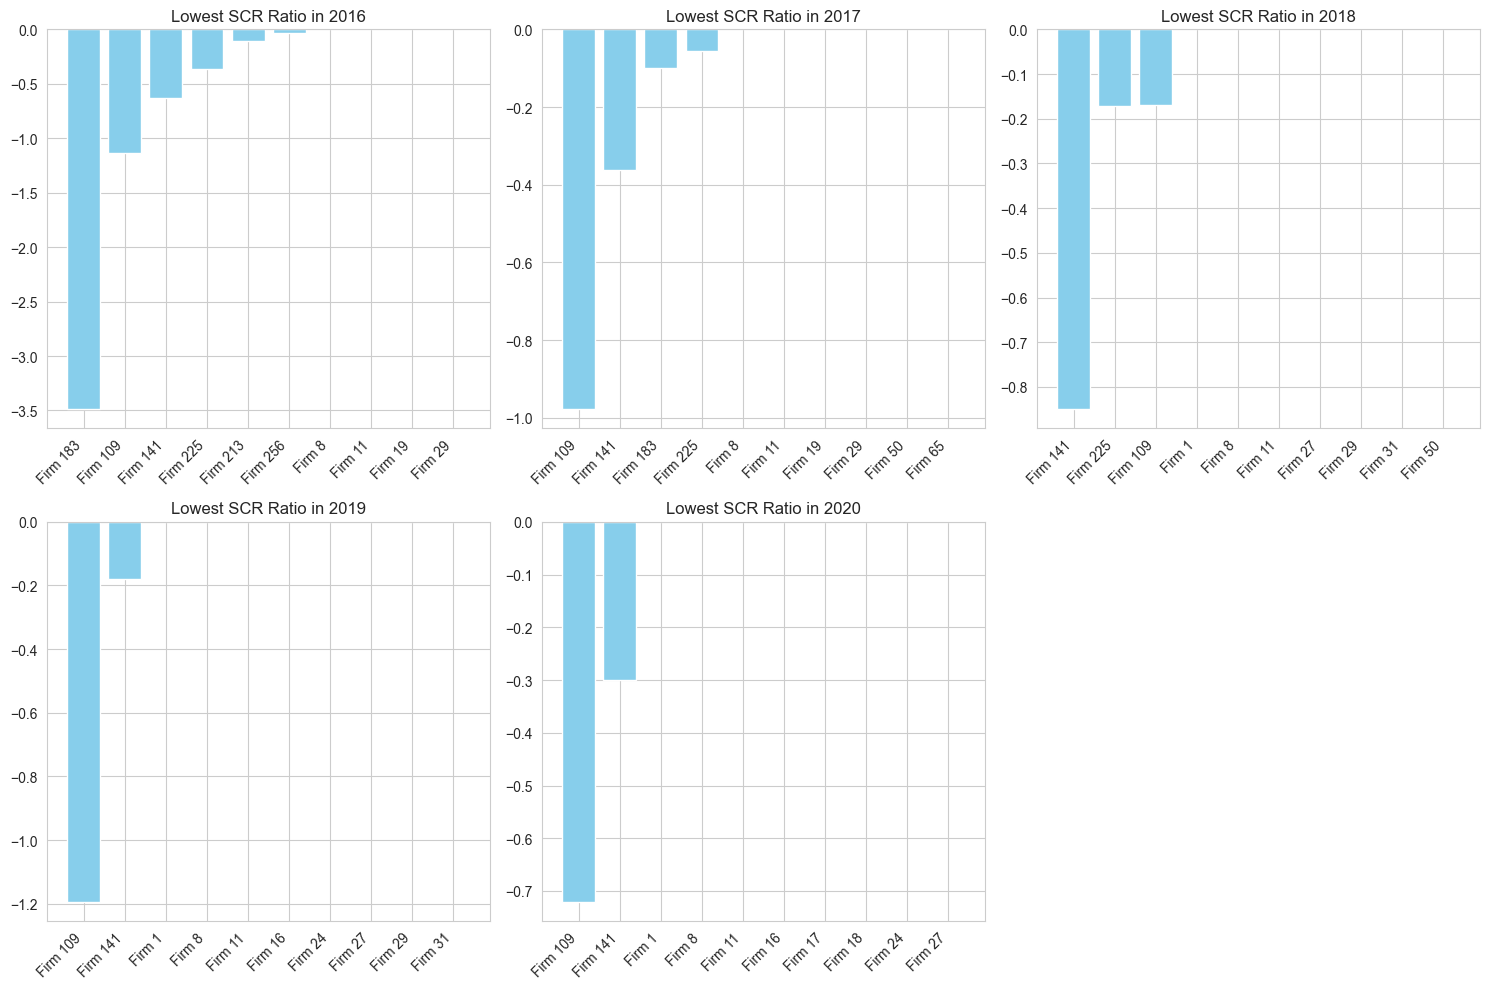

In [53]:
# Subsetting the data for SCR coverage ratio for faster analysis
scr_cols = [col for col in df.columns if ('SCR coverage' in col) or ('Firms' in col)]
scr_df = df[scr_cols]

df_selected = scr_df


# Select the top 10 or 20 firms with the lowest SCR ratio for each year
top_firms_2016 = df_selected.nsmallest(10, 'SCR coverage ratio_2016')
top_firms_2017 = df_selected.nsmallest(10, 'SCR coverage ratio_2017')
top_firms_2018 = df_selected.nsmallest(10, 'SCR coverage ratio_2018')
top_firms_2019 = df_selected.nsmallest(10, 'SCR coverage ratio_2019')
top_firms_2020 = df_selected.nsmallest(10, 'SCR coverage ratio_2020')

# Plot bar charts for the top firms with the lowest SCR ratio for each year
plt.figure(figsize=(15, 10))

# 2016
plt.subplot(2, 3, 1)
plt.bar(top_firms_2016['Firms'], top_firms_2016['SCR coverage ratio_2016'], color='skyblue')
plt.title('Lowest SCR Ratio in 2016')
plt.xticks(rotation=45, ha='right')

# 2017
plt.subplot(2, 3, 2)
plt.bar(top_firms_2017['Firms'], top_firms_2017['SCR coverage ratio_2017'], color='skyblue')
plt.title('Lowest SCR Ratio in 2017')
plt.xticks(rotation=45, ha='right')

# 2018
plt.subplot(2, 3, 3)
plt.bar(top_firms_2018['Firms'], top_firms_2018['SCR coverage ratio_2018'], color='skyblue')
plt.title('Lowest SCR Ratio in 2018')
plt.xticks(rotation=45, ha='right')

# 2019
plt.subplot(2, 3, 4)
plt.bar(top_firms_2019['Firms'], top_firms_2019['SCR coverage ratio_2019'], color='skyblue')
plt.title('Lowest SCR Ratio in 2019')
plt.xticks(rotation=45, ha='right')

# 2020
plt.subplot(2, 3, 5)
plt.bar(top_firms_2020['Firms'], top_firms_2020['SCR coverage ratio_2020'], color='skyblue')
plt.title('Lowest SCR Ratio in 2020')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

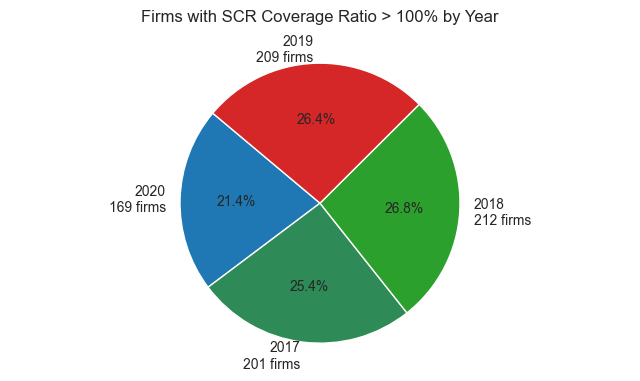

In [54]:
# Count the number of firms with SCR coverage ratio greater than 100% for each year
scr_2020_count = len(df_selected[df_selected['SCR coverage ratio_2020'] > 1])
scr_2017_count = len(df_selected[df_selected['SCR coverage ratio_2017'] > 1])
scr_2018_count = len(df_selected[df_selected['SCR coverage ratio_2018'] > 1])
scr_2019_count = len(df_selected[df_selected['SCR coverage ratio_2019'] > 1])

# Create labels and sizes for the pie chart
labels = [f'2020\n{scr_2020_count} firms', f'2017\n{scr_2017_count} firms', 
          f'2018\n{scr_2018_count} firms', f'2019\n{scr_2019_count} firms']
sizes = [scr_2020_count, scr_2017_count, scr_2018_count, scr_2019_count]

# Define custom color palette
colors = ['#1f77b4', 'seagreen', '#2ca02c', '#d62728']

# Plot the pie chart
plt.figure(figsize=(8, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Firms with SCR Coverage Ratio > 100% by Year', pad=20)  # Adjust pad parameter
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Gross Combined Ratio Analysis

In [55]:
# Dataframe containing gross combined ratios 

gross_combined_ratio_cols = merged_df
gross_combined_ratio_cols = [col for col in merged_df.columns if ('Gross combined ratio' in col) or ('Firms' in col)]
gross_combined_ratio_df = merged_df[gross_combined_ratio_cols]

In [56]:
# Calculating the average gross combined ratio over years for visualization purpose

gross_combined_ratio_df['Average_Gross_combined_ratio'] =  (gross_combined_ratio_df['Gross combined ratio_2016']+gross_combined_ratio_df['Gross combined ratio_2017']+gross_combined_ratio_df['Gross combined ratio_2018']+gross_combined_ratio_df['Gross combined ratio_2019']+gross_combined_ratio_df['Gross combined ratio_2020'] )/ 5


C:\Users\HTC\AppData\Local\Temp\ipykernel_10984\1712682133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_combined_ratio_df['Average_Gross_combined_ratio'] =  (gross_combined_ratio_df['Gross combined ratio_2016']+gross_combined_ratio_df['Gross combined ratio_2017']+gross_combined_ratio_df['Gross combined ratio_2018']+gross_combined_ratio_df['Gross combined ratio_2019']+gross_combined_ratio_df['Gross combined ratio_2020'] )/ 5


0       0.13501
1      0.923559
2           0.0
3      0.755062
4      1.243146
         ...   
320    1.006944
321    0.974532
322         0.0
323    1.283248
324    0.280013
Name: Average_Gross_combined_ratio, Length: 325, dtype: object

C:\Users\HTC\AppData\Local\Temp\ipykernel_10984\2480958904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_combined_ratio_df['Average_Gross_combined_ratio'] = gross_combined_ratio_df['Average_Gross_combined_ratio'].astype(float)


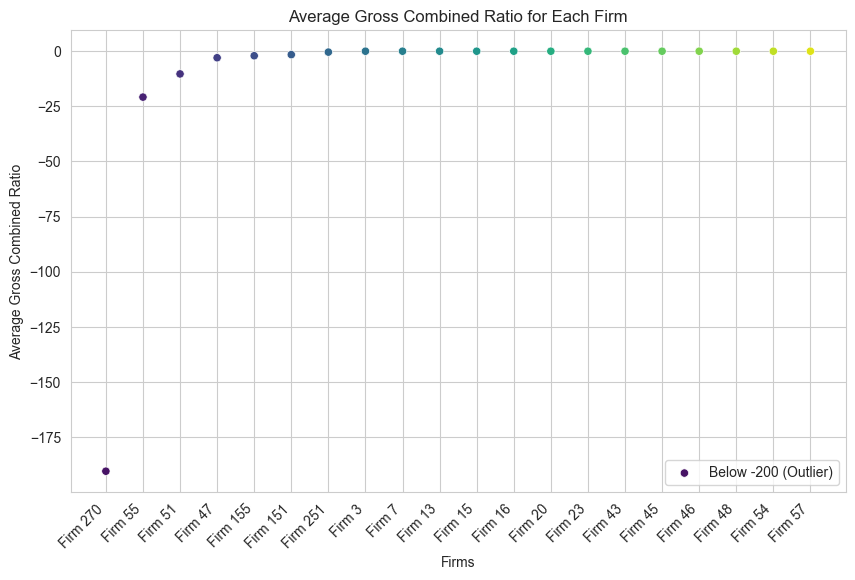

In [57]:
# Get the 20 firms with the lowest averages needing most attention 
gross_combined_ratio_df['Average_Gross_combined_ratio'] = gross_combined_ratio_df['Average_Gross_combined_ratio'].astype(float)
top_20_lowest_average = gross_combined_ratio_df.nsmallest(20, 'Average_Gross_combined_ratio')

plt.figure(figsize=(10, 6))

# Plot the scatter plot with different colors for each data point
sns.scatterplot(x='Firms', y='Average_Gross_combined_ratio', hue='Firms', sizes=(2000,5000),palette='viridis', data=top_20_lowest_average, legend=False)

plt.xlabel('Firms')
plt.ylabel('Average Gross Combined Ratio')
plt.title('Average Gross Combined Ratio for Each Firm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout
plt.legend(title='', labels=['Below -200 (Outlier)', 'Other'])


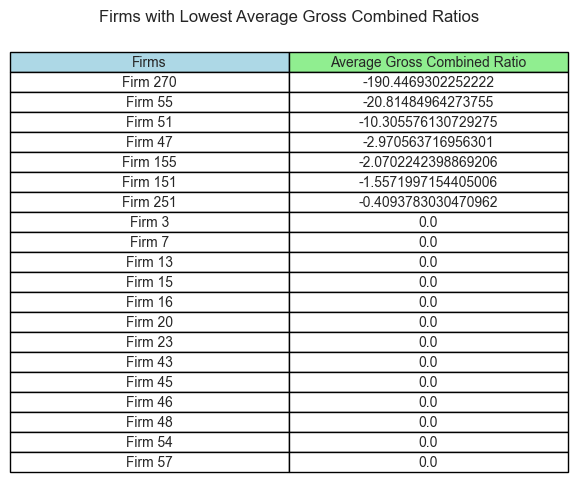

In [58]:
# Exclude the outlier and put the firms with lowest average in the table 


# Extract columns from the DataFrame
firms = top_20_lowest_average['Firms'].tolist()
ratios = top_20_lowest_average['Average_Gross_combined_ratio'].tolist()

# Create a table using the Table class
fig, ax = plt.subplots(figsize=(6, 3))
table_data = []
for firm, ratio in zip(firms, ratios):
    table_data.append([firm, ratio])

table = ax.table(cellText=table_data, colLabels=['Firms', 'Average Gross Combined Ratio'],
                 loc='center', cellLoc='center', colColours=['lightblue', 'lightgreen'])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale the table to fit the figure better

# Remove axis
ax.axis('off')

# Add title outside the table
plt.title('Firms with Lowest Average Gross Combined Ratios', fontsize=12, pad=90)  # Adjust pad as needed

plt.show()

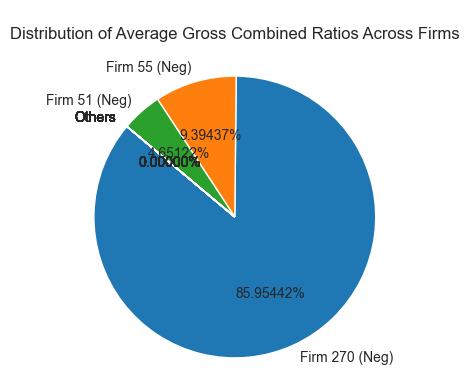

In [59]:
# Processing the data for calculating ratios for the piechart visualization of Gross Combined Ratios

# Preprocess the data
processed_ratios = [abs(ratio) for ratio in top_20_lowest_average['Average_Gross_combined_ratio']]
labels = [f"{firm} (Neg)" if ratio < 0 else firm for firm, ratio in zip(top_20_lowest_average['Firms'], top_20_lowest_average['Average_Gross_combined_ratio'])]

# Combine slices below 2% into "Others"
threshold = 2
total = sum(processed_ratios)
other_ratio = sum(ratio for ratio in processed_ratios if ratio / total < threshold / 100)
processed_ratios = [ratio if ratio / total >= threshold / 100 else 0 for ratio in processed_ratios]
labels = ['Others' if ratio == 0 else label for ratio, label in zip(processed_ratios, labels)]

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(processed_ratios, labels=labels, autopct='%1.5f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('\nDistribution of Average Gross Combined Ratios Across Firms', y=1.05)  # Adjust the position of the title

plt.show()


### Net Written Premium Vs Net Combined Ratio Analysis

Getting the required columns in a subset dataframe

In [60]:
ncr_nwp_cols = [col for col in merged_df.columns if ('NWP' in col) or ('Firms' in col) or ('Net combined ratio' in col)]
ncr_nwp_df = merged_df[ncr_nwp_cols]

Following code blocks below are for plotting visualization charts for NCR and NWP for the years 2016 to 2017 

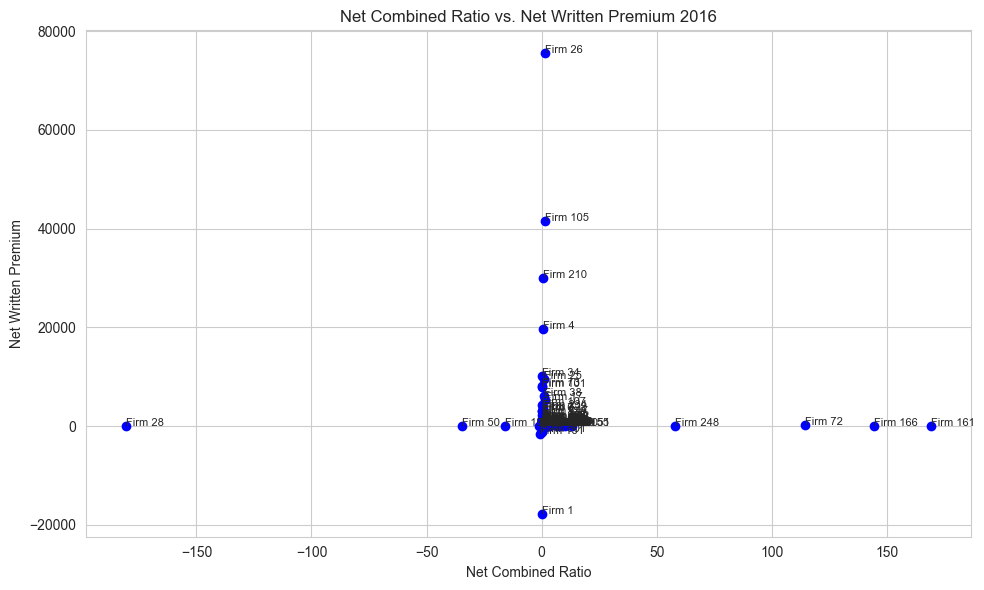

In [61]:
#Plotting visualization charts for NCR and NWP for the years 2016 to 2017 

#ncr_nwp_df

# Scatter plot with labels for 2016
plt.figure(figsize=(10, 6))
plt.scatter(ncr_nwp_df['Net combined ratio_2016'], ncr_nwp_df['NWP (£m) _2016'], color='blue')

# Add labels for each point
for i, txt in enumerate(ncr_nwp_df['Firms']):
    plt.annotate(txt, (ncr_nwp_df['Net combined ratio_2016'][i], ncr_nwp_df['NWP (£m) _2016'][i]), fontsize=8)

# Add labels and title
plt.xlabel('Net Combined Ratio')
plt.ylabel('Net Written Premium')
plt.title('Net Combined Ratio vs. Net Written Premium 2016')

plt.grid(True)
plt.tight_layout()
plt.show()

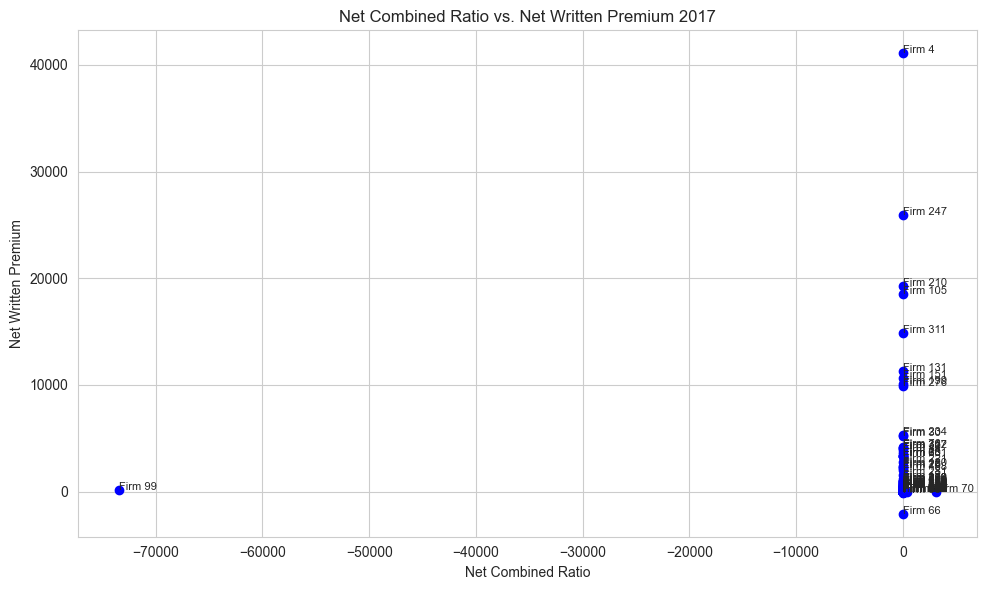

In [62]:
# Scatter plot with labels for 2017
plt.figure(figsize=(10, 6))
plt.scatter(ncr_nwp_df['Net combined ratio_2017'], ncr_nwp_df['NWP (£m) _2017'], color='blue')

# Add labels for each point
for i, txt in enumerate(ncr_nwp_df['Firms']):
    plt.annotate(txt, (ncr_nwp_df['Net combined ratio_2017'][i], ncr_nwp_df['NWP (£m) _2017'][i]), fontsize=8)

# Add labels and title
plt.xlabel('Net Combined Ratio')
plt.ylabel('Net Written Premium')
plt.title('Net Combined Ratio vs. Net Written Premium 2017')

plt.grid(True)
plt.tight_layout()
plt.show()

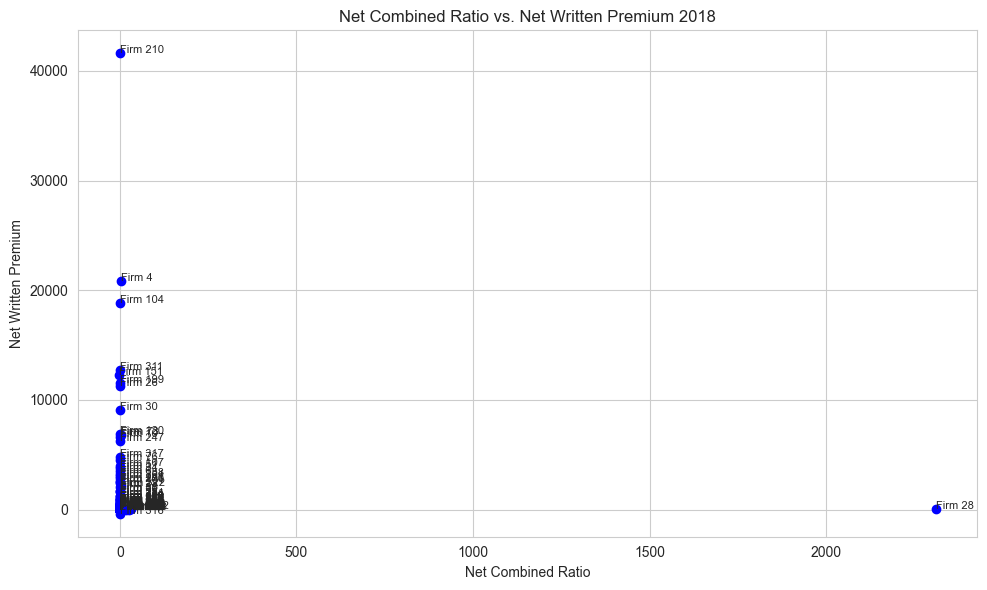

In [63]:
# Scatter plot with labels for 2018
plt.figure(figsize=(10, 6))
plt.scatter(ncr_nwp_df['Net combined ratio_2018'], ncr_nwp_df['NWP (£m) _2018'], color='blue')

# Add labels for each point
for i, txt in enumerate(ncr_nwp_df['Firms']):
    plt.annotate(txt, (ncr_nwp_df['Net combined ratio_2018'][i], ncr_nwp_df['NWP (£m) _2018'][i]), fontsize=8)

# Add labels and title
plt.xlabel('Net Combined Ratio')
plt.ylabel('Net Written Premium')
plt.title('Net Combined Ratio vs. Net Written Premium 2018')

plt.grid(True)
plt.tight_layout()
plt.show()

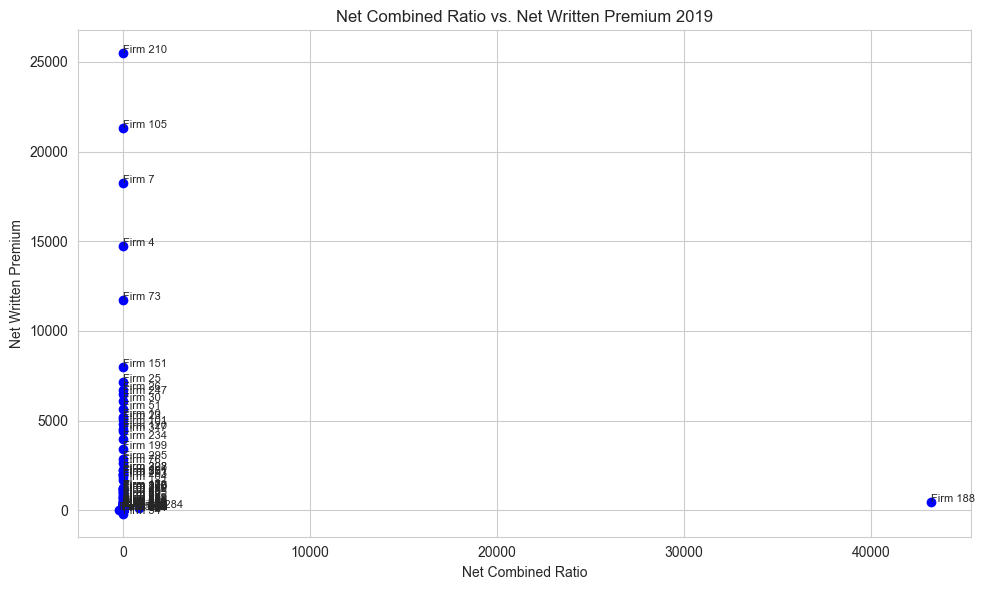

In [64]:
# Scatter plot with labels for 2019

# Scatter plot with labels
plt.figure(figsize=(10, 6))
plt.scatter(ncr_nwp_df['Net combined ratio_2019'], ncr_nwp_df['NWP (£m) _2019'], color='blue')

# Add labels for each point
for i, txt in enumerate(ncr_nwp_df['Firms']):
    plt.annotate(txt, (ncr_nwp_df['Net combined ratio_2019'][i], ncr_nwp_df['NWP (£m) _2019'][i]), fontsize=8)

# Add labels and title
plt.xlabel('Net Combined Ratio')
plt.ylabel('Net Written Premium')
plt.title('Net Combined Ratio vs. Net Written Premium 2019')

plt.grid(True)
plt.tight_layout()
plt.show()

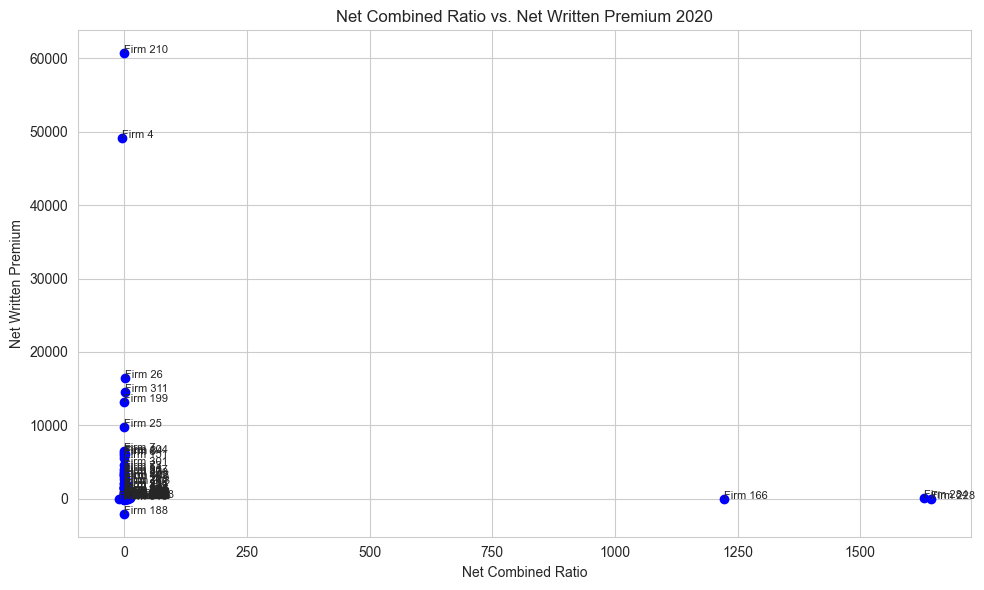

In [65]:
# Scatter plot with labels for 2020

# Scatter plot with labels
plt.figure(figsize=(10, 6))
plt.scatter(ncr_nwp_df['Net combined ratio_2020'], ncr_nwp_df['NWP (£m) _2020'], color='blue')

# Add labels for each point
for i, txt in enumerate(ncr_nwp_df['Firms']):
    plt.annotate(txt, (ncr_nwp_df['Net combined ratio_2020'][i], ncr_nwp_df['NWP (£m) _2020'][i]), fontsize=8)

# Add labels and title
plt.xlabel('Net Combined Ratio')
plt.ylabel('Net Written Premium')
plt.title('Net Combined Ratio vs. Net Written Premium 2020')

plt.grid(True)
plt.tight_layout()
plt.show()

### Net Combined Ratio Analysis 

Visualizaing the firms with highest net combined ratio mean

C:\Users\HTC\AppData\Local\Temp\ipykernel_10984\2978163982.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr_df[lst] = ncr_df[lst].astype(float)
C:\Users\HTC\AppData\Local\Temp\ipykernel_10984\2978163982.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncr_df['Mean_NCR'] = ncr_df.mean(axis=1)
C:\Users\HTC\AppData\Local\Temp\ipykernel_10984\2978163982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

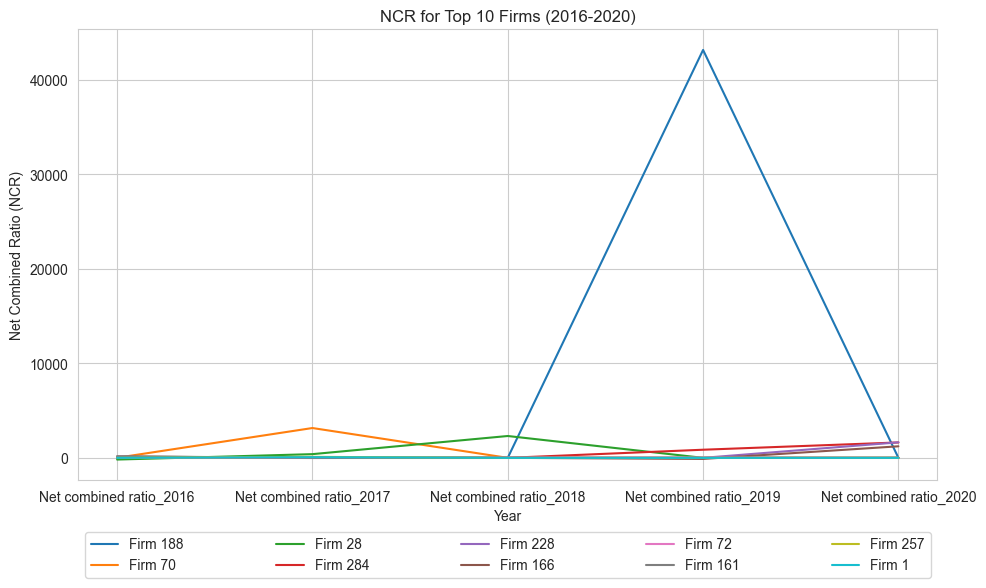

In [66]:

ncr_cols = [col for col in merged_df.columns if 'Net combined ratio' in col or 'Firms' in col]
ncr_df = merged_df[ncr_cols]

lst = []
for column in ncr_df.columns:
    if column != 'Firms':
        lst.append(column)

ncr_df[lst] = ncr_df[lst].astype(float)
ncr_df.set_index('Firms', inplace=True)



#Set Firms to index here
# Calculate the mean NCR for each firm over the years
ncr_df['Mean_NCR'] = ncr_df.mean(axis=1)
# Convert the 'Mean_NCR' column to numeric
ncr_df['Mean_NCR'] = pd.to_numeric(ncr_df['Mean_NCR'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Drop rows with NaN values in the 'Mean_NCR' column
ncr_df.dropna(subset=['Mean_NCR'], inplace=True)



# Select the top 50 firms based on mean NCR
top_10_firms = ncr_df.nlargest(10, 'Mean_NCR')

top_10_firms.drop(columns=['Mean_NCR'], inplace=True)
# Transpose the DataFrame so that years become rows and firms become columns
df_transposed = top_10_firms.T


# Plot the transposed DataFrame
plt.figure(figsize=(10, 6))

# Iterate over each firm and plot its GWP values for each year
for firm in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[firm], label=firm)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Net Combined Ratio (NCR)')
plt.title('NCR for Top 10 Firms (2016-2020)')

# Adjust legend to be below the graph with separate columns
plt.legend(bbox_to_anchor=(0., -0.2, 1., .1002),  ncol=5, mode="expand")

plt.grid(True)  # Add gridlines for better readability

plt.tight_layout()
plt.show()

### Gross Claims Incurred Analysis

In [67]:
gross_claims_cols = [col for col in merged_df.columns if ('Gross claims incurred' in col) or ('Firms' in col) ]
gross_claims_df = merged_df[gross_claims_cols]
gross_claims_df[gross_claims_cols] = gross_claims_df[gross_claims_cols].astype(float)

Visualizing the top 10 or 20 firms with the lowest Gross claims incurred  for each year

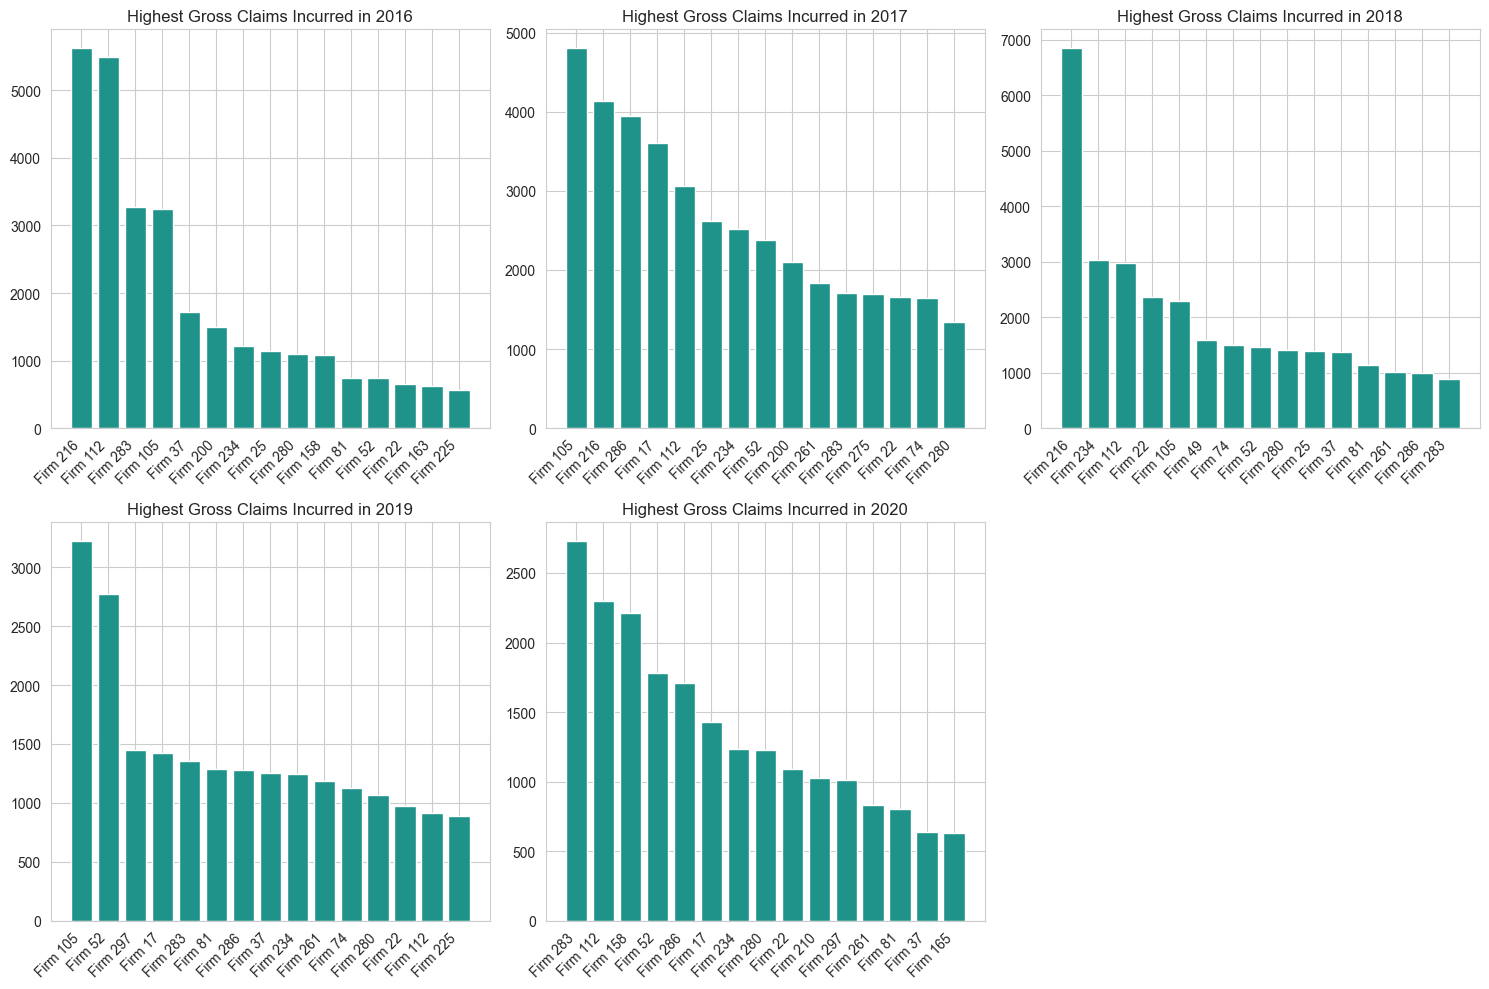

In [ ]:

# Select the top 10 or 20 firms with the lowest Gross claims incurred  for each year
top_firms_2016 = gross_claims_df.nlargest(15, 'Gross claims incurred (£m)_2016')
top_firms_2017 = gross_claims_df.nlargest(15, 'Gross claims incurred (£m)_2017')
top_firms_2018 = gross_claims_df.nlargest(15, 'Gross claims incurred (£m)_2018')
top_firms_2019 = gross_claims_df.nlargest(15, 'Gross claims incurred (£m)_2019')
top_firms_2020 = gross_claims_df.nlargest(15, 'Gross claims incurred (£m)_2020')

# Plot bar charts for the top firms with the lowest Gross claims incurred for each year
plt.figure(figsize=(15, 10))

# 2016
plt.subplot(2, 3, 1)
plt.bar(top_firms_2016['Firms'], top_firms_2016['Gross claims incurred (£m)_2016'], color='#1F9289')
plt.title('Highest Gross Claims Incurred in 2016')
plt.xticks(rotation=45, ha='right')

# 2017
plt.subplot(2, 3, 2)
plt.bar(top_firms_2017['Firms'], top_firms_2017['Gross claims incurred (£m)_2017'], color='#1F9289')
plt.title('Highest Gross Claims Incurred in 2017')
plt.xticks(rotation=45, ha='right')

# 2018
plt.subplot(2, 3, 3)
plt.bar(top_firms_2018['Firms'], top_firms_2018['Gross claims incurred (£m)_2018'], color='#1F9289')
plt.title('Highest Gross Claims Incurred in 2018')
plt.xticks(rotation=45, ha='right')

# 2019
plt.subplot(2, 3, 4)
plt.bar(top_firms_2019['Firms'], top_firms_2019['Gross claims incurred (£m)_2019'], color='#1F9289')
plt.title('Highest Gross Claims Incurred in 2019')
plt.xticks(rotation=45, ha='right')

# 2020
plt.subplot(2, 3, 5)
plt.bar(top_firms_2020['Firms'], top_firms_2020['Gross claims incurred (£m)_2020'], color='#1F9289')
plt.title('Highest Gross Claims Incurred in 2020')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Trend Analysis - Gross Claims Incurred 

Visualizing line charts for gross claims incurred over the years. The firms are selected on the basis of largest mean gross claims incurred.

C:\Users\HTC\AppData\Local\Temp\ipykernel_27516\14568846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_claims_df['Mean_Gross_claims'] = gross_claims_df.mean(axis=1)
C:\Users\HTC\AppData\Local\Temp\ipykernel_27516\14568846.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gross_claims_df['Mean_Gross_claims'] = pd.to_numeric(gross_claims_df['Mean_Gross_claims'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN
C:\Users\HTC\AppData\Local\Temp\ipykernel_27516\14568846.py:10: Set

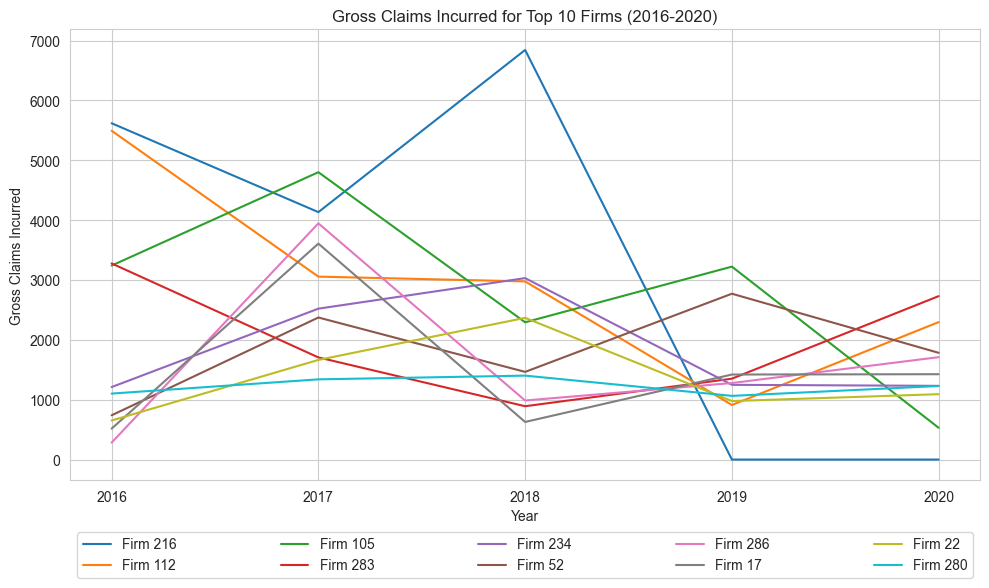

In [ ]:
#Set Firms to index here for plotting purposes 

# Calculate the mean NCR for each firm over the years
gross_claims_df['Mean_Gross_claims'] = gross_claims_df.mean(axis=1)
# Convert the 'Mean_NCR' column to numeric
gross_claims_df['Mean_Gross_claims'] = pd.to_numeric(gross_claims_df['Mean_Gross_claims'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Drop rows with NaN values in the 'Mean_NCR' column
gross_claims_df.dropna(subset=['Mean_Gross_claims'], inplace=True)

# Select the top 10 firms based on mean NCR
top_10_firms = gross_claims_df.nlargest(10, 'Mean_Gross_claims')
x_ticks_values = ['2016', '2017', '2018', '2019', '2020']

top_10_firms.drop(columns=['Mean_Gross_claims'], inplace=True)
# Transpose the DataFrame so that years become rows and firms become columns
df_transposed = top_10_firms.T

# Plot the transposed DataFrame
plt.figure(figsize=(10, 6))

# Iterate over each firm and plot its GWP values for each year
for firm in df_transposed.columns:
    plt.plot(x_ticks_values, df_transposed[firm], label=firm)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Gross Claims Incurred')
plt.title('Gross Claims Incurred for Top 10 Firms (2016-2020)')

# Adjust legend to be below the graph with separate columns
plt.legend(bbox_to_anchor=(0., -0.2, 1., .1002),  ncol=5, mode="expand")

plt.grid(True)  # Add gridlines for better readability

plt.tight_layout()
plt.show()

### Machine Learning Techniques Explored

The following code conducts anomaly detection for the Gross Written Premium (GWP) feature spanning from 2016 to 2020, employing the isolation forest machine learning algorithm. 

In [69]:
from sklearn.ensemble import IsolationForest
import numpy as np 

# Select columns for anomaly detection
selected_columns = ['GWP (£m)_2016', 'GWP (£m)_2017', 'GWP (£m)_2018', 'GWP (£m)_2019', 'GWP (£m)_2020']

# Prepare data
X = df[selected_columns].values

# Train Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01)  # Adjust contamination parameter as needed
isolation_forest.fit(X)

# Predict outliers
outliers = isolation_forest.predict(X)

# Anomalies will have a prediction of -1
anomalies_indices = np.where(outliers == -1)[0]

Anamolies visualization for specific columns: 

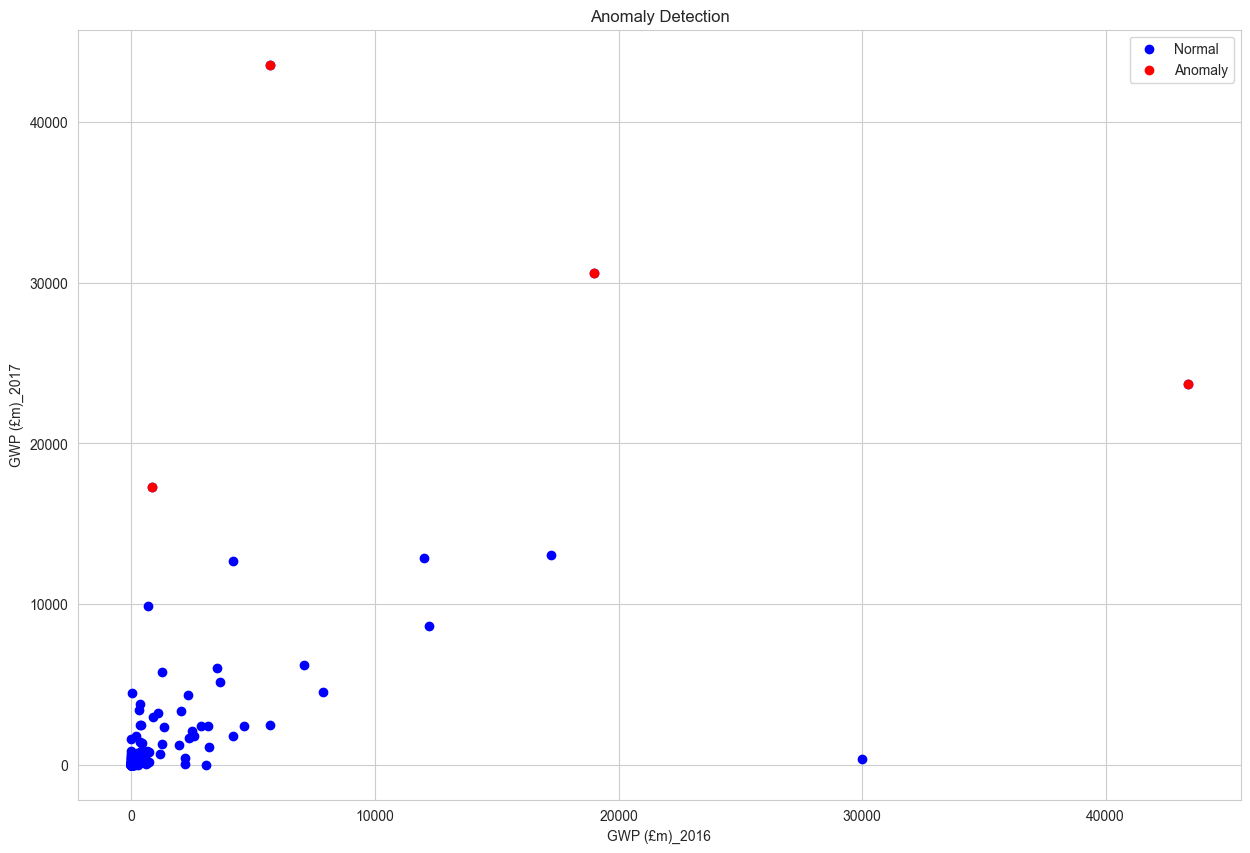

In [ ]:
# Select columns for anomaly detection
selected_columns = ['GWP (£m)_2016', 'GWP (£m)_2017', 'GWP (£m)_2018', 'GWP (£m)_2019', 'GWP (£m)_2020']

# Prepare data
X = df[selected_columns].values


plt.figure(figsize=(15, 10))

# Plot normal data points
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal')  

# Plot anomalies in red
plt.scatter(X[anomalies_indices, 0], X[anomalies_indices, 1], c='red', label='Anomaly')  

plt.xlabel(selected_columns[0])
plt.ylabel(selected_columns[1])
plt.title('Anomaly Detection')
plt.legend()
plt.show()

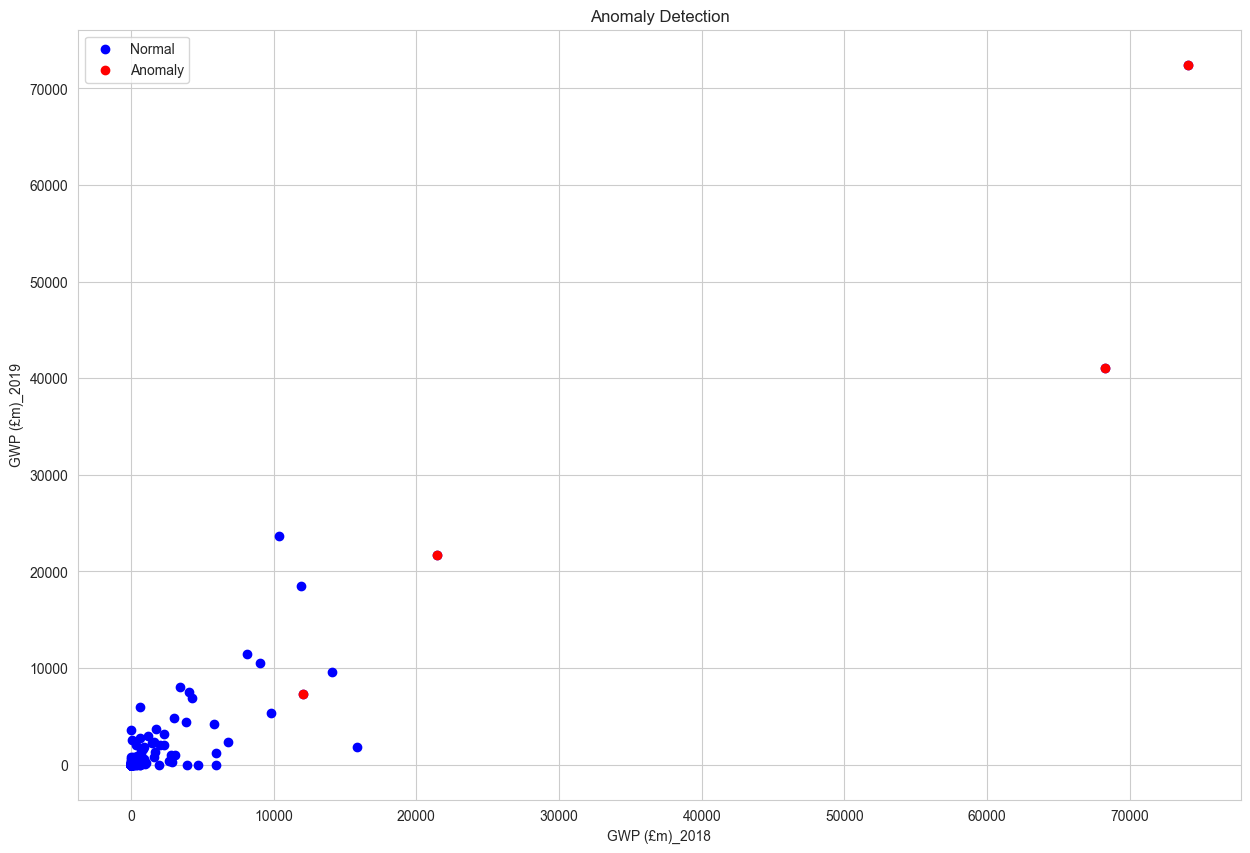

In [ ]:
plt.figure(figsize=(15, 10))

# Plot normal data points
plt.scatter(X[:, 2], X[:, 3], c='blue', label='Normal')  

# Plot anomalies in red
plt.scatter(X[anomalies_indices, 2], X[anomalies_indices, 3], c='red', label='Anomaly')  

plt.xlabel(selected_columns[2])
plt.ylabel(selected_columns[3])
plt.title('Anomaly Detection')
plt.legend()
plt.show()

### Classification Model

In the following block of code, a classification model is developed using features such as Gross Claims Incurred (£m)_2019, Total Liabilities (£m)_2019, Total Assets (£m)_2019, Net Expense Ratio_2019, GWP (£m)_2020, and NWP (£m)_2019 based on data from 2019. The model aims to predict the SCR (Solvency Capital Requirement) coverage ratio as the target variable to identify high and low-risk companies.
For training purposes, SCR coverage ratio >1 is used to identify companies as low risk and those less than one are high risk. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define target variable based on SCR coverage ratio
# Firms with SCR coverage ratio > 100% are considered low risk, others are high risk
df['Risk'] = df['SCR coverage ratio_2019'] > 1

# Select features and target variable
X = df[['Gross claims incurred (£m)_2019','Total liabilities (£m)_2019' , 'Total assets (£m)_2019', 'Net expense ratio_2019', 'GWP (£m)_2020','NWP (£m) _2019']]  # Example features
y = df['Risk']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Choose a classifier (Logistic Regression)
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6307692307692307
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00        47
        True       0.64      0.99      0.77        83

    accuracy                           0.63       130
   macro avg       0.32      0.49      0.39       130
weighted avg       0.41      0.63      0.49       130

